# Consolidate_EDA( including All steps)

### Perform a complete EDA workflow on a given dataset:  Data cleaning, Univariate & bivariate analysis, Outlier detection, Missing value treatment, Feature correlation analysis.And also Preprocessing using ColumnTransformer to handle missing values, encode categorical data, and scale numerical features.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data= pd.read_csv("adult.csv")



In [5]:
print(data.head())

   age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States

## Data Cleaning

In [6]:
# Check for missing values in workclass column
print("Missing values in 'workclass':", data['workclass'].isnull().sum())
print("Unique values in 'workclass':", data['workclass'].unique())

# Count '?' values which represent missing data
missing_workclass = (data['workclass'] == '?').sum()
print("'?' values in workclass:", missing_workclass)

# Replace '?' with 'Unknown'
data_clean = data.copy()
data_clean['workclass'] = data_clean['workclass'].replace('?', 'Unknown')
print("\nAfter cleaning - Unique values:", data_clean['workclass'].unique())

Missing values in 'workclass': 0
Unique values in 'workclass': ['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']
'?' values in workclass: 1836

After cleaning - Unique values: ['Unknown' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc'
 'Self-emp-inc' 'Local-gov' 'Without-pay' 'Never-worked']


Age Statistics:
count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64


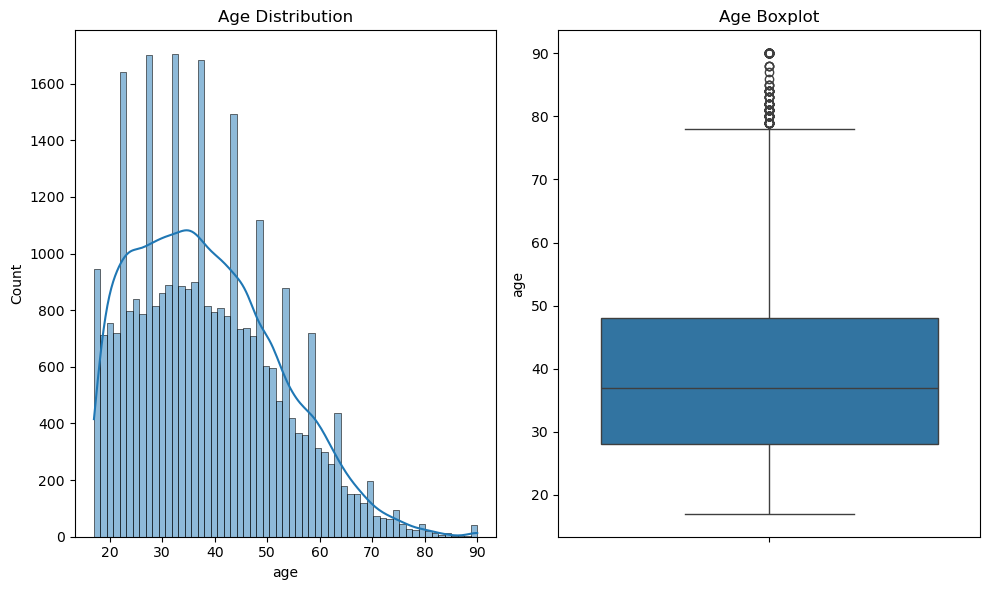

In [7]:


# Basic statistics for age
print("Age Statistics:")
print(data_clean['age'].describe())

# Histogram for age distribution
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.histplot(data_clean['age'], kde=True)
plt.title('Age Distribution')

# Boxplot for age
plt.subplot(1, 2, 2)
sns.boxplot(y=data_clean['age'])
plt.title('Age Boxplot')
plt.tight_layout()
plt.show()

Number of outliers in capital.gain: 2712
Outlier range: < 0.0 or > 0.0


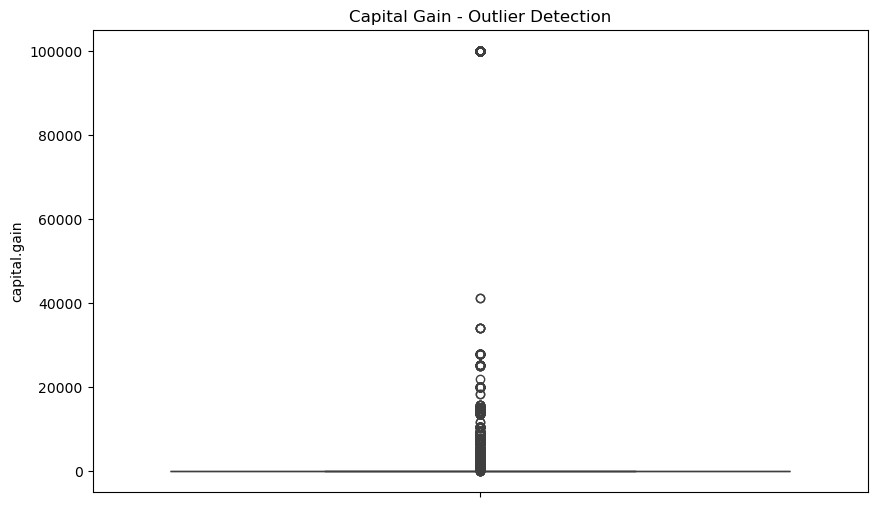

In [8]:
# Detect outliers in capital.gain using IQR method
Q1 = data_clean['capital.gain'].quantile(0.25)
Q3 = data_clean['capital.gain'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data_clean[(data_clean['capital.gain'] < lower_bound) | 
                     (data_clean['capital.gain'] > upper_bound)]
print(f"Number of outliers in capital.gain: {len(outliers)}")
print(f"Outlier range: < {lower_bound} or > {upper_bound}")

# Visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(y=data_clean['capital.gain'])
plt.title('Capital Gain - Outlier Detection')
plt.show()

<Figure size 1200x600 with 0 Axes>

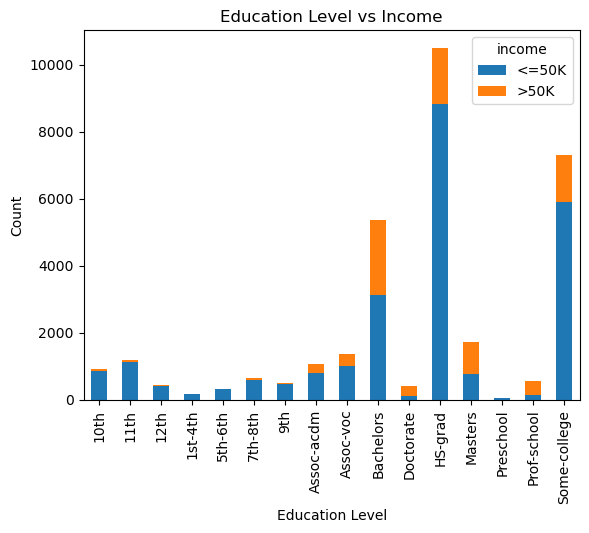


Percentage of >50K income by education:
education
Doctorate       0.740920
Prof-school     0.734375
Masters         0.556587
Bachelors       0.414753
Assoc-voc       0.261216
Assoc-acdm      0.248360
Some-college    0.190235
HS-grad         0.159509
12th            0.076212
10th            0.066452
7th-8th         0.061920
9th             0.052529
11th            0.051064
5th-6th         0.048048
1st-4th         0.035714
Preschool       0.000000
Name: >50K, dtype: float64


In [9]:
# Relationship between education and income
plt.figure(figsize=(12, 6))
education_income = pd.crosstab(data_clean['education'], data_clean['income'])
education_income.plot(kind='bar', stacked=True)
plt.title('Education Level vs Income')
plt.xlabel('Education Level')
plt.ylabel('Count')

plt.show()

# Percentage of >50K income by education
education_income_pct = education_income.div(education_income.sum(axis=1), axis=0)
print("\nPercentage of >50K income by education:")
print(education_income_pct['>50K'].sort_values(ascending=False))

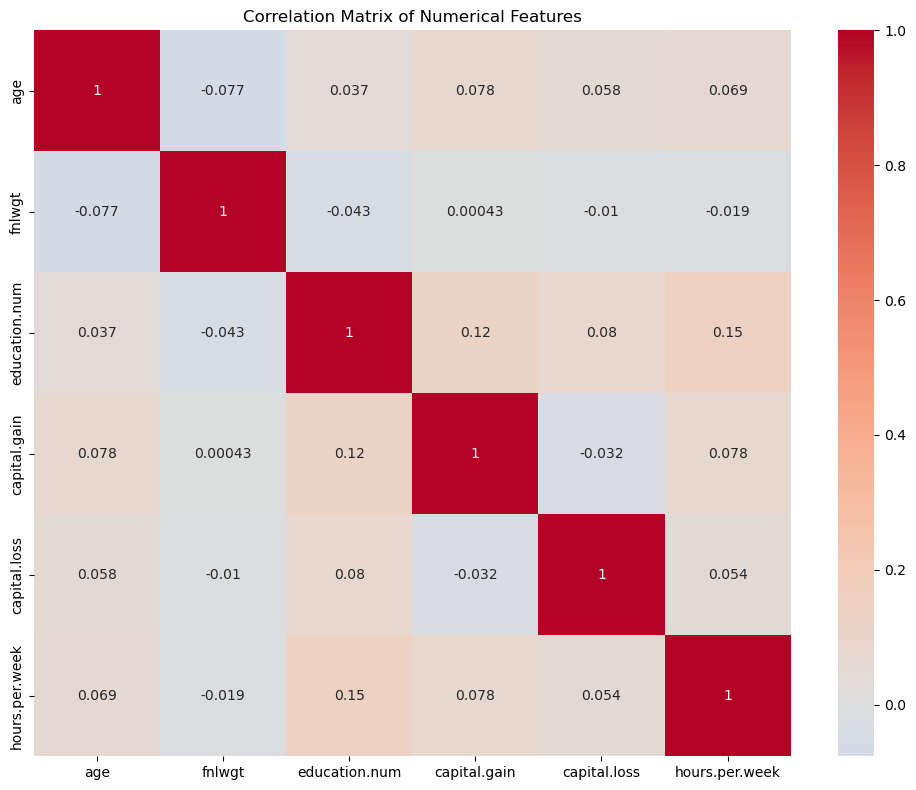

Strong correlations (|correlation| > 0.5):
Empty DataFrame
Columns: []
Index: []


In [11]:
# Select numerical columns for correlation
numerical_cols = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']
correlation_matrix = data_clean[numerical_cols].corr()

# Heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

# Print strong correlations (absolute value > 0.5)
strong_corr = correlation_matrix[(correlation_matrix.abs() > 0.5) & (correlation_matrix != 1)]
print("Strong correlations (|correlation| > 0.5):")
print(strong_corr.dropna(how='all').dropna(axis=1, how='all'))